<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
import pandas as pd
import numpy as np
from math import sqrt



!pandas read csv form github

#[url로 외부에서 데이터 가져오기]
url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/NBA_player_of_the_week.csv"
df = pd.read_csv(url)

/bin/bash: pandas: command not found


In [ ]:
df.head()

,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season
0,Jayson Tatum,Boston Celtics,East,"Feb 10, 2020",SF,6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1
1,Nikola Jokic,Denver Nuggets,West,"Feb 10, 2020",C,7'0,250,25,2014,4,2019-2020,2020,KK Mega Bemax (Serbia),0.5,213,113,1
2,Jaylen Brown,Boston Celtics,East,"Feb 3, 2020",SF,6'7,220,23,2016,3,2019-2020,2020,California,0.5,201,99,1
3,Damian Lillard,Portland Trail Blazers,West,"Feb 3, 2020",G,6'3,195,29,2012,7,2019-2020,2020,Weber State,0.5,190,88,1
4,Pascal Siakam,Toronto Raptors,East,"Jan 27, 2020",F,6'9,230,25,2016,3,2019-2020,2020,New Mexico State,0.5,206,104,1


In [ ]:
df.describe()

,Weight,Age,Draft Year,Seasons in league,Season short,Real_value,Height CM,Weight KG,Last Season
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,224.567164,26.738060,1996.287313,5.740299,2003.156716,0.686940,201.071642,101.384328,0.023881
std,30.798885,3.400683,11.253558,3.293421,11.470164,0.242007,9.367970,14.011226,0.152734
min,150.000000,19.000000,1965.000000,0.000000,1980.000000,0.500000,175.000000,68.000000,0.000000
25%,205.000000,24.000000,1987.000000,3.000000,1994.000000,0.500000,193.000000,93.000000,0.000000
50%,220.000000,26.000000,1998.000000,5.000000,2005.000000,0.500000,201.000000,99.000000,0.000000
75%,250.000000,29.000000,2005.000000,8.000000,2013.000000,1.000000,208.000000,113.000000,0.000000
max,325.000000,40.000000,2018.000000,17.000000,2020.000000,1.000000,229.000000,147.000000,1.000000


In [ ]:
 df_set = df[["Height CM", "Weight KG", "Age"]]
 df_set.head()

,Height CM,Weight KG,Age
0,203,94,21
1,213,113,25
2,201,99,23
3,190,88,29
4,206,104,25


In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
normalized_data = scaler.fit_transform(df_set)
normalized_data

array([[0.51851852, 0.32911392, 0.0952381 ],
       [0.7037037 , 0.56962025, 0.28571429],
       [0.48148148, 0.39240506, 0.19047619],
       ...,
       [0.48148148, 0.37974684, 0.23809524],
       [0.38888889, 0.21518987, 0.23809524],
       [0.42592593, 0.27848101, 0.52380952]])

In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=["height","weight","age"])
normalized_df.describe()# 데이터의 min max가 0과 1사이에 있다는 걸 확인하기 위해 

,height,weight,age
count,1340.000000,1340.000000,1340.000000
mean,0.482808,0.422586,0.368479
std,0.173481,0.177357,0.161937
min,0.000000,0.000000,0.000000
25%,0.333333,0.316456,0.238095
50%,0.481481,0.392405,0.333333
75%,0.611111,0.569620,0.476190
max,1.000000,1.000000,1.000000


feature scaling : 입력변수들의 크기를 조정해서 일정 범위 내에 떨어지도록 바꾸는 것   
그중 min-max normalization : 최소값, 최대값을 이용해서 변수의 크기를 0과 1 사이로 조정   
이는 경사하강법을 좀더 빠리 할 수 있게 도와준다.   
  
이번시간에는 어떻게 그게 가능한지 확인함   
  
선형회귀에서는 데이터에 잘 맞는 일차함수를 찾는 것인데   
이것은 평균제곱오차를 최소화하겠다는 의미이다.   
  
천만단위를 가지고 있는 함수를 feature scale을 함으로써 결과값이 차이가 큰폭으로 발생되지 않게 한다.   
그리고 등고선의 수직방향이 가장 가파른 경사를 의미한다 등고선이 찌그러져 있으면, 여러 방향으로 움직이면서 손실이 급격히 변하나  
feature scaling을 하게 되면 수직방향을 적은 횟수 만에 최소점을 찾을 수 있다.   
이러한 방향은 다항회귀나, 로직 회귀에서도 적용가능하다


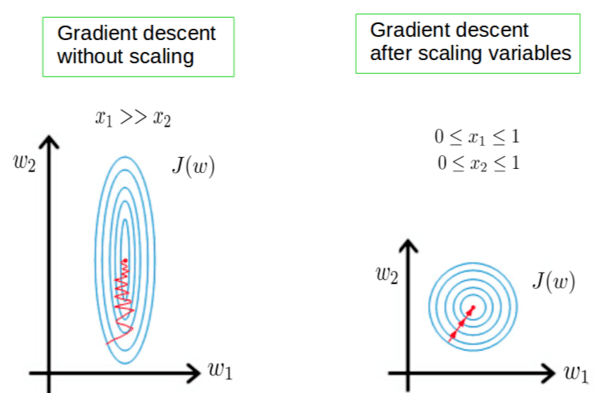

In [ ]:
df_older = pd.DataFrame([25, 49, 32, 35, 40])

In [ ]:
money = pd.DataFrame([25000000, 35000000, 30000000, 50000000, 35000000])

In [ ]:
df_older

,0
0,25
1,49
2,32
3,35
4,40


In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
normalized_data = scaler.fit_transform(df_older)
normalized_data

array([[0.        ],
       [1.        ],
       [0.29166667],
       [0.41666667],
       [0.625     ]])

In [ ]:
normalized_data = scaler.fit_transform(money)
normalized_data

array([[0. ],
       [0.4],
       [0.2],
       [1. ],
       [0.4]])

# one-hot Encoding 

In [ ]:
# 범주형 데이터를 수치형 데이터로 바꾸어주어야 함 
# 혈액형을 예로 들어볼게요
# A, B, AB, O형이 있는데 이 친구들에게 1,2,3,4의 형태로 숫자로 변형해주었다고 할까요?
# 오호~ 분석을 진행하는데 혈액형별로 크기가 주어저버려서 문제가 발생이 되네요
# 그럼 어떻게 해야할까요? 각각의 row별로 4개의 컬럼을 만들어주어 0, 1로 넣어주면 되겠네요
# 이러한 방법을 one-hot Encoding이라고 한다. 

In [ ]:
 df.head()

,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season
0,Jayson Tatum,Boston Celtics,East,"Feb 10, 2020",SF,6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1
1,Nikola Jokic,Denver Nuggets,West,"Feb 10, 2020",C,7'0,250,25,2014,4,2019-2020,2020,KK Mega Bemax (Serbia),0.5,213,113,1
2,Jaylen Brown,Boston Celtics,East,"Feb 3, 2020",SF,6'7,220,23,2016,3,2019-2020,2020,California,0.5,201,99,1
3,Damian Lillard,Portland Trail Blazers,West,"Feb 3, 2020",G,6'3,195,29,2012,7,2019-2020,2020,Weber State,0.5,190,88,1
4,Pascal Siakam,Toronto Raptors,East,"Jan 27, 2020",F,6'9,230,25,2016,3,2019-2020,2020,New Mexico State,0.5,206,104,1


In [ ]:
df1 = df[["Position", "Conference"]]

In [ ]:
one_hot_encoded_df = pd.get_dummies(df1)
one_hot_encoded_df

,Position_C,Position_F,Position_F-C,Position_FC,Position_G,Position_G-F,Position_GF,Position_PF,Position_PG,Position_SF,Position_SG,Conference_East,Conference_West
0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0,0,0,0,1,0,0,0,0,0,0,0,0
1336,0,0,0,0,0,0,0,0,1,0,0,0,0
1337,0,0,0,0,0,0,1,0,0,0,0,0,0
1338,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# 기존데이터에 one_hot_encoded_df 추가하기 
one_hot_encoded_df = pd.get_dummies(data=df, columns=["Position", "Conference"])
one_hot_encoded_df.head()

,Player,Team,Date,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season,Position_C,Position_F,Position_F-C,Position_FC,Position_G,Position_G-F,Position_GF,Position_PF,Position_PG,Position_SF,Position_SG,Conference_East,Conference_West
0,Jayson Tatum,Boston Celtics,"Feb 10, 2020",6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,Nikola Jokic,Denver Nuggets,"Feb 10, 2020",7'0,250,25,2014,4,2019-2020,2020,KK Mega Bemax (Serbia),0.5,213,113,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Jaylen Brown,Boston Celtics,"Feb 3, 2020",6'7,220,23,2016,3,2019-2020,2020,California,0.5,201,99,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,Damian Lillard,Portland Trail Blazers,"Feb 3, 2020",6'3,195,29,2012,7,2019-2020,2020,Weber State,0.5,190,88,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,Pascal Siakam,Toronto Raptors,"Jan 27, 2020",6'9,230,25,2016,3,2019-2020,2020,New Mexico State,0.5,206,104,1,0,1,0,0,0,0,0,0,0,0,0,1,0


## 머신러닝이 정확하게 예측을 하지 못하는 경우가 많은데요 
##그런 경우 처리하는 방법에 대해 지금 배워볼게요

편향 :
편향이 높다 -> 모델이 너무 간단해서 복작한 곡선 관계를 학습 할 수 없다. 
편향이 낮다 -> 주어진 데이터의 관계를 잘 학습한다. 

분산 : 데이터 셋 별로 모델이 얼마나 일관된 성능을 보여주는지 알려준다 
분산이 높다 : 성능차이가 많이 난다. 
분산이 낮다 : 성능 차이가 적다 

과소적합(underfit) : 위 모델은 편향이 높고, 분산이 낮은 모델
과적합(overfit) : 편향이 낮고, 분산이 높은 모델
편향 - 분산 트레이드오프 : 일반적으로 편향과 분산은 하나가 줄어들수록 하나는 늘어나는 관계

과소적합 해결방법 : 충분히 복잡한 높은 차원의 다항 데이터를 사용하는 것 

In [ ]:
url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/admission_data.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = df.drop(["Chance of Admit "], axis=1)

polynomial_transformer = PolynomialFeatures(6)
Polynomial_Features = polynomial_transformer.fit_transform(X.values)
features = polynomial_transformer.get_feature_names(X.columns)
X = pd.DataFrame(Polynomial_Features, columns=features)
X.head()

,1,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Serial No.^2,Serial No. GRE Score,Serial No. TOEFL Score,Serial No. University Rating,Serial No. SOP,Serial No. LOR,Serial No. CGPA,Serial No. Research,GRE Score^2,GRE Score TOEFL Score,GRE Score University Rating,GRE Score SOP,GRE Score LOR,GRE Score CGPA,GRE Score Research,TOEFL Score^2,TOEFL Score University Rating,TOEFL Score SOP,TOEFL Score LOR,TOEFL Score CGPA,TOEFL Score Research,University Rating^2,University Rating SOP,University Rating LOR,University Rating CGPA,University Rating Research,SOP^2,SOP LOR,SOP CGPA,SOP Research,LOR ^2,...,SOP LOR ^2 Research^3,SOP LOR CGPA^4,SOP LOR CGPA^3 Research,SOP LOR CGPA^2 Research^2,SOP LOR CGPA Research^3,SOP LOR Research^4,SOP CGPA^5,SOP CGPA^4 Research,SOP CGPA^3 Research^2,SOP CGPA^2 Research^3,SOP CGPA Research^4,SOP Research^5,LOR ^6,LOR ^5 CGPA,LOR ^5 Research,LOR ^4 CGPA^2,LOR ^4 CGPA Research,LOR ^4 Research^2,LOR ^3 CGPA^3,LOR ^3 CGPA^2 Research,LOR ^3 CGPA Research^2,LOR ^3 Research^3,LOR ^2 CGPA^4,LOR ^2 CGPA^3 Research,LOR ^2 CGPA^2 Research^2,LOR ^2 CGPA Research^3,LOR ^2 Research^4,LOR CGPA^5,LOR CGPA^4 Research,LOR CGPA^3 Research^2,LOR CGPA^2 Research^3,LOR CGPA Research^4,LOR Research^5,CGPA^6,CGPA^5 Research,CGPA^4 Research^2,CGPA^3 Research^3,CGPA^2 Research^4,CGPA Research^5,Research^6
0,1.0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,113569.0,39766.0,1348.0,1516.5,1516.5,3252.05,337.0,13924.0,472.0,531.0,531.0,1138.70,118.0,16.0,18.0,18.0,38.60,4.0,20.25,20.25,43.425,4.5,20.25,...,91.125,175603.950127,18197.300531,1885.730625,195.4125,20.25,376572.915271,39023.100028,4043.844563,419.05125,43.425,4.5,8303.765625,17806.964062,1845.28125,38186.045156,3957.103125,410.0625,81887.852391,8485.787812,879.35625,91.125,175603.950127,18197.300531,1885.730625,195.4125,20.25,376572.915271,39023.100028,4043.844563,419.05125,43.425,4.5,807539.696082,83682.870060,8671.800006,898.632125,93.1225,9.65,1.0
1,1.0,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,4.0,648.0,214.0,8.0,8.0,9.0,17.74,2.0,104976.0,34668.0,1296.0,1296.0,1458.0,2873.88,324.0,11449.0,428.0,428.0,481.5,949.09,107.0,16.0,16.0,18.0,35.48,4.0,16.00,18.00,35.480,4.0,20.25,...,81.000,111420.982685,12561.553854,1416.184200,159.6600,18.00,219623.136981,24760.218374,2791.456412,314.70760,35.480,4.0,8303.765625,16367.644688,1845.28125,32262.446306,3637.254375,410.0625,63592.866386,7169.432512,808.27875,91.125,125348.605521,14131.748086,1593.207225,179.6175,20.25,247076.029104,27855.245671,3140.388463,354.04605,39.915,4.5,487014.306256,54905.784245,6190.054594,697.864103,78.6769,8.87,1.0
2,1.0,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,9.0,948.0,312.0,9.0,9.0,10.5,24.00,3.0,99856.0,32864.0,948.0,948.0,1106.0,2528.00,316.0,10816.0,312.0,312.0,364.0,832.00,104.0,9.0,9.0,10.5,24.00,3.0,9.00,10.50,24.000,3.0,12.25,...,36.750,43008.000000,5376.000000,672.000000,84.0000,10.50,98304.000000,12288.000000,1536.000000,192.00000,24.000,3.0,1838.265625,4201.750000,525.21875,9604.000000,1200.500000,150.0625,21952.000000,2744.000000,343.00000,42.875,50176.000000,6272.000000,784.000000,98.0000,12.25,114688.000000,14336.000000,1792.000000,224.00000,28.000,3.5,262144.000000,32768.000000,4096.000000,512.000000,64.0000,8.00,1.0
3,1.0,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,16.0,1288.0,440.0,12.0,14.0,10.0,34.68,4.0,103684.0,35420.0,966.0,1127.0,805.0,2791.74,322.0,12100.0,330.0,385.0,275.0,953.70,110.0,9.0,10.5,7.5,26.01,3.0,12.25,8.75,30.345,3.5,6.25,...,21.875,49440.680863,5702.500676,657.727875,75.8625,8.75,171460.281233,19776.272345,2281.000270,263.09115,30.345,3.5,244.140625,846.679688,97.65625,2936.285156,338.671875,39.0625,10183.036922,1174.514062,135.46875,15.625,35314.772045,4073.214769,469.805625,54.1875,6.25,122471.629452,14125.908818,1629.285907,187.92225,21.675,2.5,424731.610940,48988.651781,5650.363527,651.714363,75.1689,8.67,1.0
4,1.0,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,25.0,1570.0,515.0,10.0,10.0,15.0,41.05,0.0,98596.0,32342.0,628.0,62

In [ ]:
y = df[["Chance of Admit "]]
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train, y_train_predict)
print(sqrt(mse))
print()
mse = mean_squared_error(y_test, y_test_predict)
print(sqrt(mse))

7.801921946944297e-10

0.9952571531146508


정규화 : 가설함수의 세터값들이 너무 커지는 걸 방지해서 과적합을 예방하는 방법

손실함수가 작을수록 좋은 가설함수 
손실함수가 클수록 더 안좋은 가설함수

위에서 우리는 train에는 좋은 값을 가졌으나, test에서 안좋은 값을 나타내었던 모델을 개선하고자 한다. 

좋은 가설함수의 기준을 조금만 바꾸어주면 이러한 문제를 해결할 수 있다. 

새로운 기준 : train data에 대한 오차도 작고 세타값들도 작아야지 좋은 가설 함수이다 

L1 절대값을 다 더한다. lasso모델
L2제곱한 값을 더한다.  ridge모델

#L1 Lasso 정규화 

In [2]:
url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/admission_data.csv"
df = pd.read_csv(url)

X = df.drop(["Chance of Admit "], axis=1)

polynomial_transformer = PolynomialFeatures(6)
Polynomial_Features = polynomial_transformer.fit_transform(X.values)
features = polynomial_transformer.get_feature_names(X.columns)
X = pd.DataFrame(Polynomial_Features, columns=features)

y = df[["Chance of Admit "]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
model = Lasso(alpha=0.001, max_iter=1000, normalize=True)
# alpha = 람타는 세타값이 커짐에 따라 얼마큼의 패널티를 줄지를 결정하는 변수인데 여기서는 그걸 알파(alpha)이다 
# max_iter = 경사하강법을 몇번할지를 설정해주는 것 
# normalize=True feature scale을 하면 더 극소점을 빨리 찾을 수 있는데, lasso는 자체적으로 그 기능을 가지고 있음 
# L2 정규화를 하려면 Lasso를 Ridge로 바꾸어주면 된다. ( 옵셔널 파라미터는 lasso와 같다 )
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_train, y_train_predict)
print(sqrt(mse))
print()
mse = mean_squared_error(y_test, y_test_predict)
print(sqrt(mse))

0.06329575019490115

0.06000348571173352


K겹 교차 검증 

학습데이터
평가데이터 
를 가지고 모델을 만들면 무슨 문제가 발생될까?
이곳에서만 성능이 좋거나, 이곳에서만 성능이 안좋은 모델을 만들 수 있다.
모델의 성능을 적절하게 할 수 없다라는 문제점이 있다. 

이러한 문제를 해결하기 위해 K겹 교차 검증 을 하게 된다. 

K겹 교차 검증은 하나의 데이터를 k로 나눈 후 K-1개로 훈련을 시키고 나머지 1개로 테스트를 진행하는 평가한다. 위와 같이 5개의 데이터를 돌아가면서 훈련&평가를 시키고 해당 성능평가의 평균을 구하는 방법이다. 

In [6]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

하이퍼파라미터 : 우리가 직접넣어줘야하는 파라마터들이다. 

좋은 하이퍼파라미터를 넣어주어야 되는데, 그 좋은 하이퍼파라미터를 고르는 방법이 그리드서치이다
